In [1]:
!pip install lightgbm

In [2]:
#importing required libraries
import pandas as pd
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import lightgbm as lgbm
import warnings as wr
wr.filterwarnings("ignore")
#special display options
pd.set_option("display.max_columns", None)

In [3]:
# reading and loading the dataset
train = pd.read_csv(r'C:\Users\User\Desktop\Assigment_4\Project-Housing_splitted\train.csv')
train             
#creating data frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,Ga

In [4]:
# reading and loading the dataset
test = pd.read_csv(r'C:\Users\User\Desktop\Assigment_4\Project-Housing_splitted\test.csv')
test            #creating data frame

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf

In [5]:
#checking datatypes of all columns
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
#to know the features of the dataset
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
#statistical summary 
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#checking the dimensions of train and test dataset
print ('Training set Number of rows: ' + str(train.shape[0]))
print ('Training set Number of columns: ' + str(train.shape[1]))

print('_'*40)

print ('Test set Number of rows: ' + str(test.shape[0]))
print ('Test set Number of columns: ' + str(test.shape[1]))

Training set Number of rows: 1168
Training set Number of columns: 81
________________________________________
Test set Number of rows: 292
Test set Number of columns: 80


# Missing Values and duplicated values

In [10]:
# missing value, duplicated value total counts
print ('missing value =', train.isnull().sum().sum())
print ('na value =', train.isna().sum().sum())
print ('duplicated rows =', train.duplicated().sum())
print ('duplicated columns=',train.columns.duplicated().sum())

missing value = 5558
na value = 5558
duplicated rows = 0
duplicated columns= 0


In [11]:
#check what columns have missing values in training set
col_train_with_missing=[]
for c in train.columns:
    if train[c].isnull().sum()>1:
        col_train_with_missing.append(c)
print (f"There are {len(col_train_with_missing)} columns with missing values in training set. They are: {col_train_with_missing}" )

There are 18 columns with missing values in training set. They are: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [12]:
#check what columns have missing values in testing set
col_test_with_missing=[]
for c in test.columns:
    if test[c].isnull().sum()>1:
        col_test_with_missing.append(c)
print (f"There are {len(col_test_with_missing)} columns with missing values in training set. They are: {col_test_with_missing}" )

There are 16 columns with missing values in training set. They are: ['LotFrontage', 'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [13]:
#take a look at columns with missing value closely in training data
train[col_train_with_missing].head(20)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,NaN,None,0.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,NaN,NaN
1,95.0,NaN,None,0.0,TA,Gd,Gd,ALQ,Rec,TA,Attchd,1970.0,Unf,TA,TA,NaN,NaN,NaN
2,92.0,NaN,None,0.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,1997.0,Unf,TA,TA,NaN,NaN,NaN
3,105.0,NaN,BrkFace,480.0,Gd,TA,No,BLQ,Unf,TA,Attchd,1977.0,RFn,TA,TA,NaN,MnPrv,NaN
4,NaN,NaN,Stone,126.0,Gd,TA,No,ALQ,Unf,TA,Attchd,1977.0,Fin,TA,TA,NaN,NaN,NaN
5,58.0,NaN,None,0.0,Gd,TA,Av,Unf,Unf,Gd,BuiltIn,2006.0,Fin,TA,TA,NaN,NaN,NaN
6,NaN,NaN,BrkFace,180.0,Gd,TA,No,ALQ,Unf,Gd,Detchd,1957.0,Unf,TA,TA,NaN,NaN,NaN
7,88.0,NaN,BrkCmn,67.0,TA,TA,No,Rec,BLQ,TA,Attchd,1957.0,RFn,TA,TA,NaN,GdPrv,NaN
8,70.0,NaN,None,0.0,TA,TA,No,ALQ,GLQ,NaN,Detchd,1965.0,Unf,Fa,Fa,NaN,GdPrv,Shed
9,80.0,NaN,None,0.0,TA,TA,No,Rec,Unf,NaN,Detchd,1947.0,Unf,TA,TA,NaN,NaN,NaN


<AxesSubplot:>

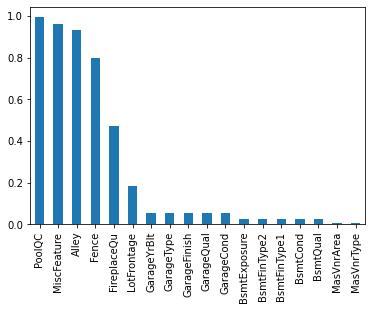

In [14]:
#plot to see % of how many missing values each column has
train[col_train_with_missing].isnull().mean().sort_values(ascending=False).plot.bar()

From the above data output, missing values seem to have some meaning. It seems if the value isn't relavant, it's missing. For example, if no bathroom, the bathroom area and bathroom type will be missing. I will give "missing" to categorical data and use a median or mean to numerical data and another column to indicate missing value is filled for missing vlaues in feature engineering section later.

# Temporal Variables(Eg: Datetime Variables)

In [15]:
#take out year variables
col_year= [feature for feature in train.columns if "Year" in feature or "Yr" in feature]
col_year_test = [feature for feature in test.columns if "Year" in feature or "Yr" in feature]

Seems GarageYtBlt is treated as categorical because it has a lot of missing values. I will try to fill in missing values later for this and convert to numerical

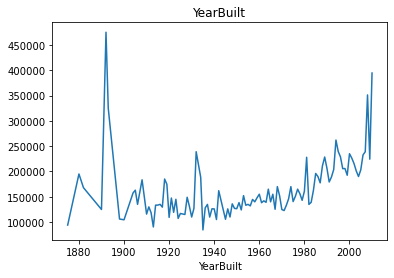

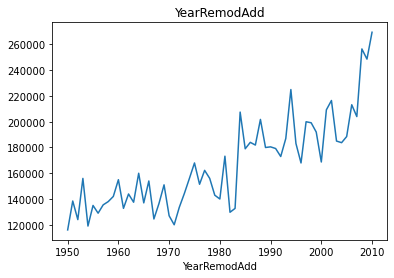

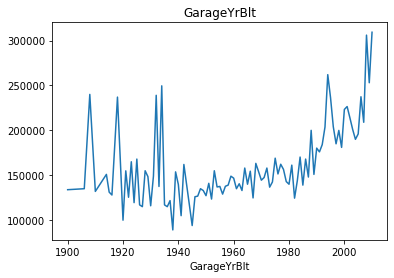

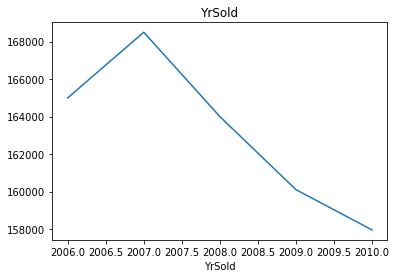

In [16]:
for feature in col_year:
    data= train.copy()
    data.groupby(feature)["SalePrice"].median().plot()
    plt.title(feature)
    plt.show()

Seems "YrSold" isn't a good feature to use directly since the houses price drop as year increase.

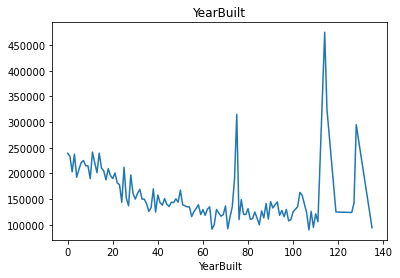

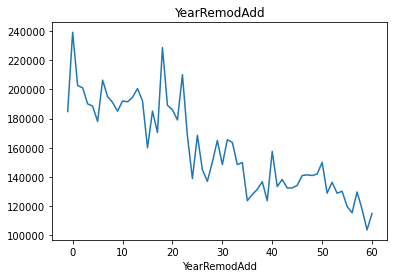

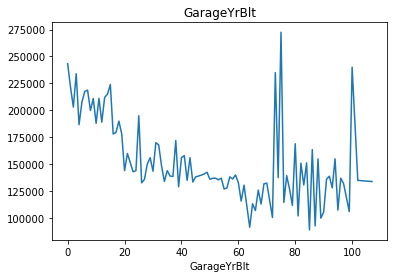

In [17]:
#create a few features, which are difference of year features with year sold and see relationship of new features to saleprice
for feature in  ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
   
    data=train.copy()
    data[feature]=data['YrSold'] - data[feature]
    data.groupby(feature)["SalePrice"].median().plot()
    plt.title(feature)
    plt.show()

Now the relationship seems reasonable. I will use those new features in feature preprocessing.

# Numerical Variables

In [19]:
#Fnd which columns are with categorical data and which with numerical data for training data
col_NonYr= [feature for feature in train.columns if feature not in col_year]
col_num=[]

col_cat=[]
for c in col_NonYr:
    
    if (train[c].dtype!='O') and (c not in col_year):
        col_num.append(c)

    else:
        col_cat.append(c)

In [20]:
#find which columns are with categorical data and which with numerical data for testing data
col_NonYr_test= [feature for feature in test.columns if feature not in col_year_test]
col_num_test=[]

col_cat_test=[]
for c in col_NonYr_test:
    
    if (test[c].dtype!='O') and (c not in col_year_test):
        col_num_test.append(c)

    else:
        col_cat_test.append(c)

In [21]:
print("there are {} numerical field, {} categorical fields in training data".format(len(col_num),len(col_cat)))
print("there are {} numerical field, {} categorical fields in testing data".format(len(col_num_test),len(col_cat_test)))

there are 34 numerical field, 43 categorical fields in training data
there are 34 numerical field, 42 categorical fields in testing data


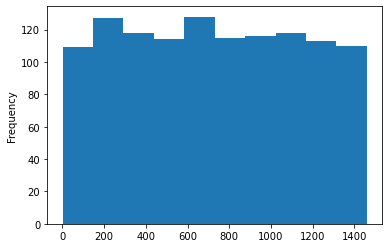

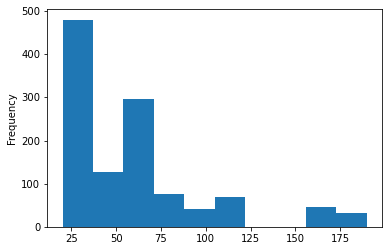

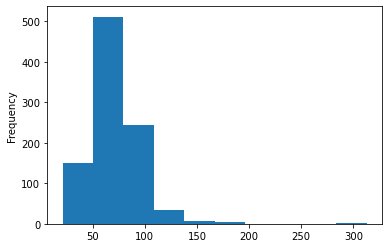

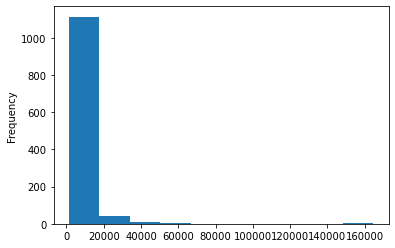

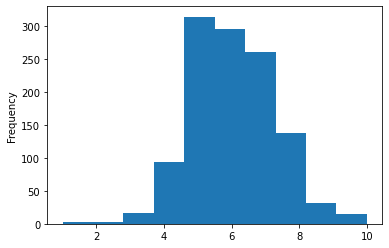

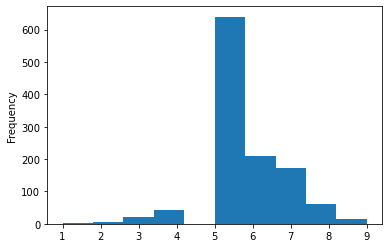

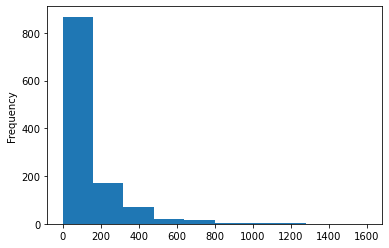

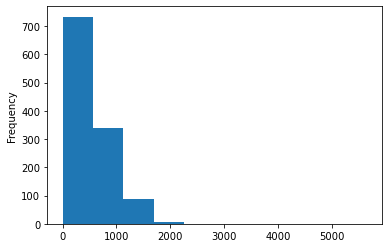

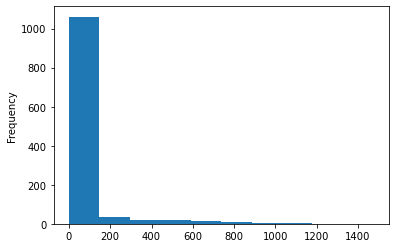

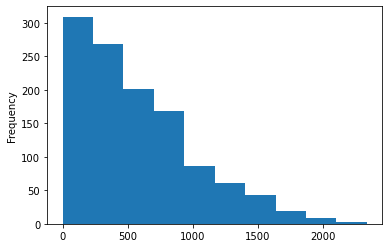

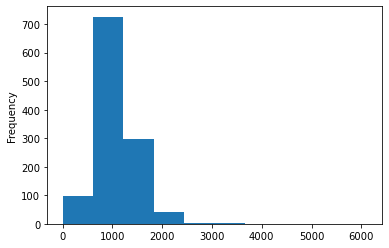

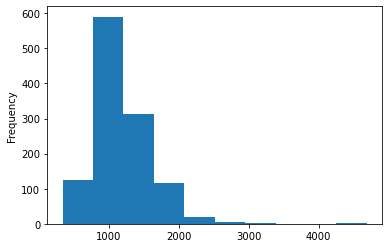

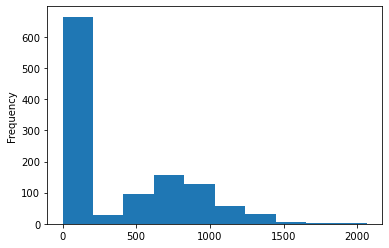

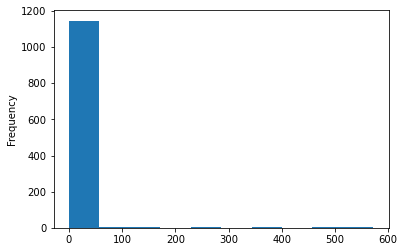

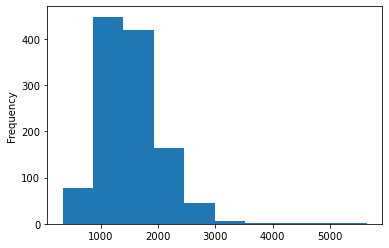

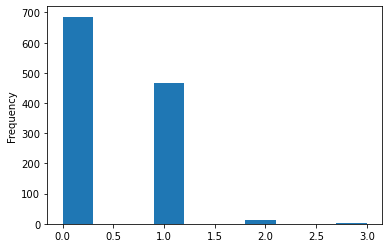

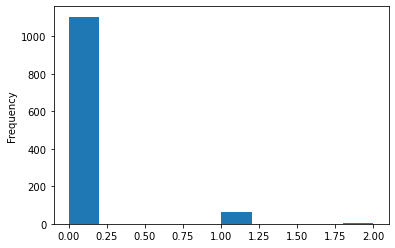

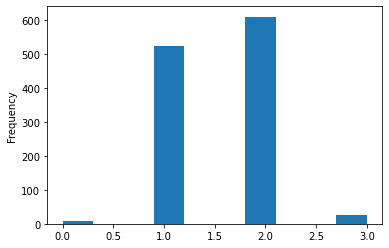

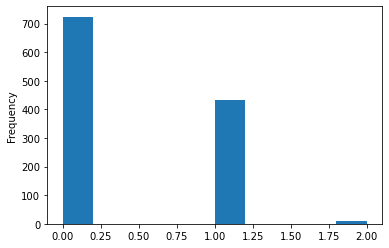

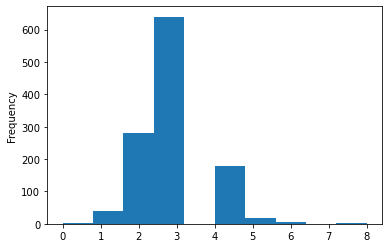

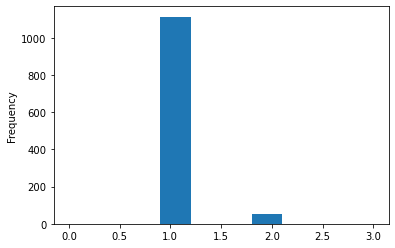

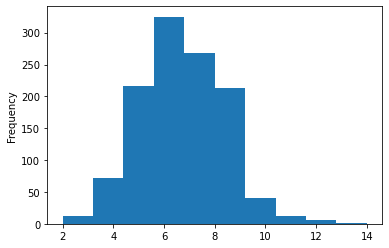

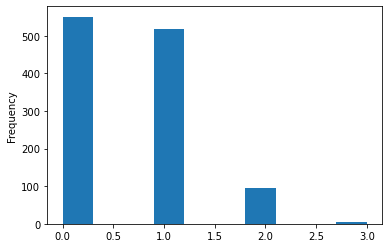

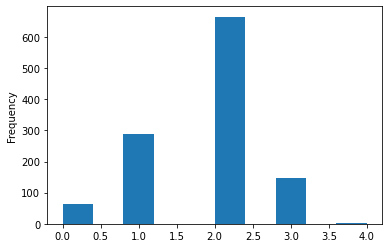

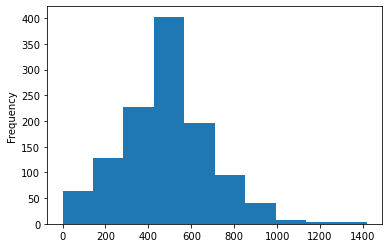

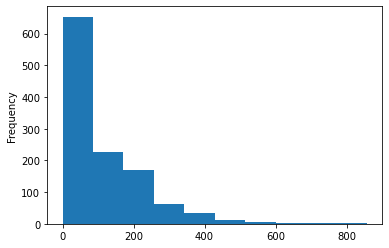

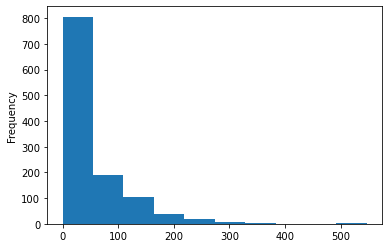

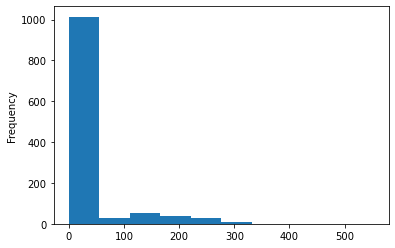

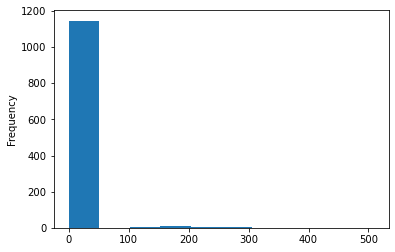

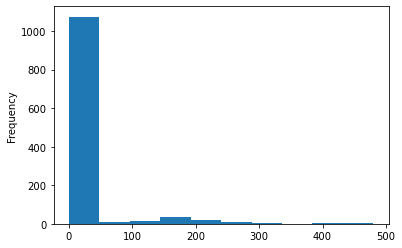

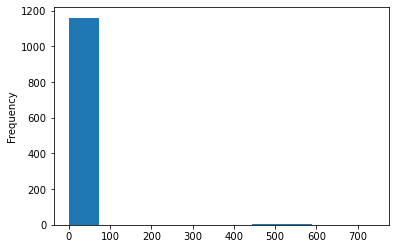

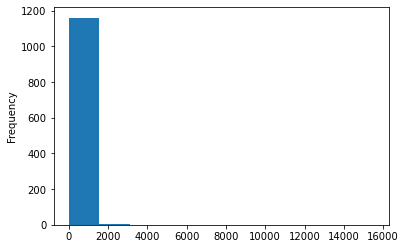

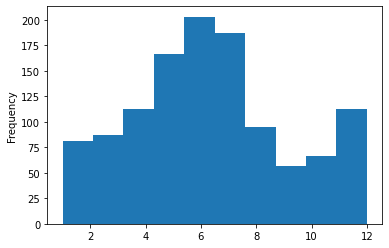

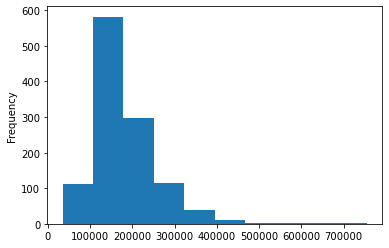

In [22]:
#histogram of all numerical features (testing data)
for feature in col_num:
    train[feature].plot.hist()
    plt.show()

Seems most of the numerical fields aren't normally distributed. Also some has outliers.

# Discrete and Continuous numerical values

In [23]:
#check unique values in each numerical feature (training data)
uniques=[]
for feature in col_num:
    unique=len(train[feature].unique())
    uniques.append(unique)
    print("Feature {} has {} unique values".format(feature, unique  ))

Feature Id has 1168 unique values
Feature MSSubClass has 15 unique values
Feature LotFrontage has 107 unique values
Feature LotArea has 892 unique values
Feature OverallQual has 10 unique values
Feature OverallCond has 9 unique values
Feature MasVnrArea has 284 unique values
Feature BsmtFinSF1 has 551 unique values
Feature BsmtFinSF2 has 122 unique values
Feature BsmtUnfSF has 681 unique values
Feature TotalBsmtSF has 636 unique values
Feature 1stFlrSF has 669 unique values
Feature 2ndFlrSF has 351 unique values
Feature LowQualFinSF has 21 unique values
Feature GrLivArea has 746 unique values
Feature BsmtFullBath has 4 unique values
Feature BsmtHalfBath has 3 unique values
Feature FullBath has 4 unique values
Feature HalfBath has 3 unique values
Feature BedroomAbvGr has 8 unique values
Feature KitchenAbvGr has 4 unique values
Feature TotRmsAbvGrd has 12 unique values
Feature Fireplaces has 4 unique values
Feature GarageCars has 5 unique values
Feature GarageArea has 392 unique values
F

In [24]:
#sort the unique feature numbers to get a cut-off count to distinguish discrete vs. continuous numerical features (training data)
uniques.sort()
uniques

[3,
 3,
 4,
 4,
 4,
 4,
 5,
 8,
 8,
 9,
 10,
 12,
 12,
 15,
 18,
 20,
 21,
 65,
 106,
 107,
 122,
 176,
 244,
 284,
 351,
 392,
 551,
 581,
 636,
 669,
 681,
 746,
 892,
 1168]

Seems when there are less than 25 unique values in numerical feature, it's a discrete feature

In [25]:
#Seperate numerical features by disc and cont features in traing and testing data
col_disc=[feature for feature in col_num if len(data[feature].unique())<=25]
col_cont=[feature for feature in col_num if feature not in col_disc]

col_disc_test=[feature for feature in col_num_test if len(test[feature].unique())<=25]
col_cont_test=[feature for feature in col_num_test if feature not in col_disc_test]

print(col_disc)
print("-------------")
print(col_cont)

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
-------------
['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [26]:
#Will try to use log normalization but first need to check 0 values in data
#check if there are 0 in numerical fields (training data)
col_num_withZero=[]
for feature in col_num:
    if np.any(train[feature]==0, axis=0):
        percentage =np.round(np.where(train[feature]==0,1,0).mean(),2)
        col_num_withZero.append(feature)
        print("Percentage of 0 value in {} feature is {}% ".format(feature, np.round(percentage*100,2)))

Percentage of 0 value in MasVnrArea feature is 59.0% 
Percentage of 0 value in BsmtFinSF1 feature is 32.0% 
Percentage of 0 value in BsmtFinSF2 feature is 88.0% 
Percentage of 0 value in BsmtUnfSF feature is 8.0% 
Percentage of 0 value in TotalBsmtSF feature is 3.0% 
Percentage of 0 value in 2ndFlrSF feature is 57.0% 
Percentage of 0 value in LowQualFinSF feature is 98.0% 
Percentage of 0 value in BsmtFullBath feature is 59.0% 
Percentage of 0 value in BsmtHalfBath feature is 95.0% 
Percentage of 0 value in FullBath feature is 1.0% 
Percentage of 0 value in HalfBath feature is 62.0% 
Percentage of 0 value in BedroomAbvGr feature is 0.0% 
Percentage of 0 value in KitchenAbvGr feature is 0.0% 
Percentage of 0 value in Fireplaces feature is 47.0% 
Percentage of 0 value in GarageCars feature is 5.0% 
Percentage of 0 value in GarageArea feature is 5.0% 
Percentage of 0 value in WoodDeckSF feature is 52.0% 
Percentage of 0 value in OpenPorchSF feature is 45.0% 
Percentage of 0 value in Enclo

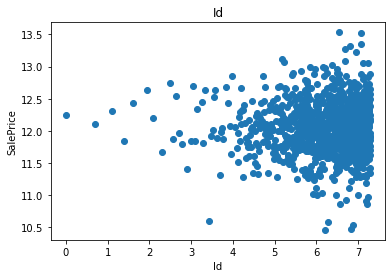

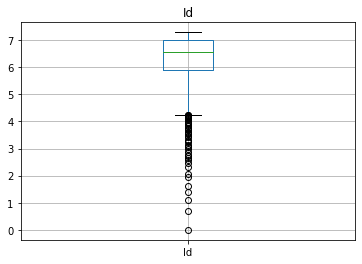

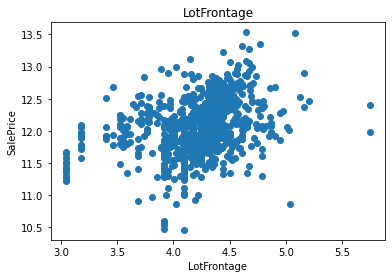

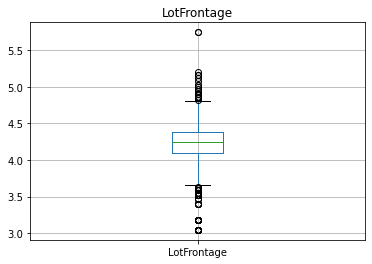

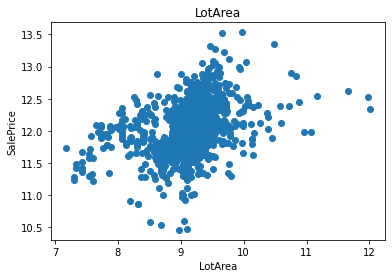

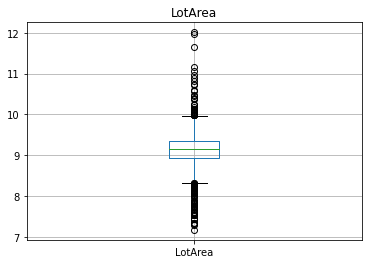

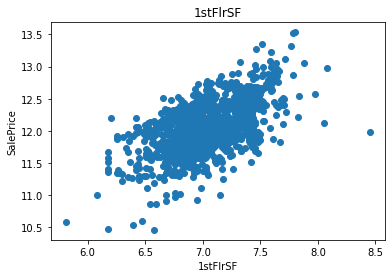

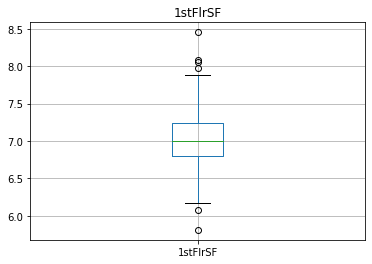

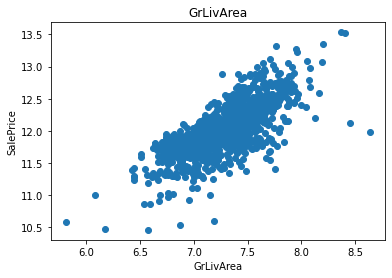

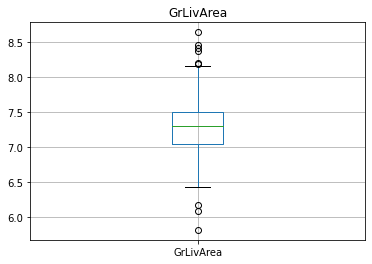

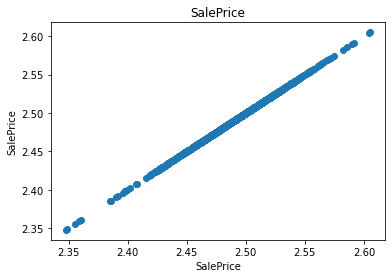

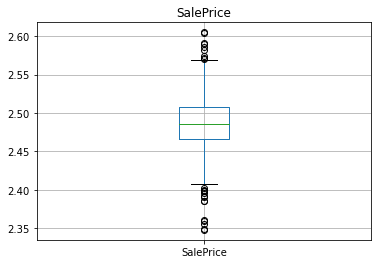

In [27]:
#Log normalize continuous numerical features and plot the distribution and relationship with sale price(training data)

for feature in col_cont:
    if np.any(train[feature]==0):
        pass
    else:
        data=train.copy()
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.title(feature)
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        
        data.boxplot(column=feature)
        plt.title(feature)
       
        plt.show()

Can see sale price increase with some numerical features Also, there are some outliers in some numerical features

# Plot to see relationship between discrete numerical features and sale price

for feature in col_disc: data=train.copy() data.groupby(feature)["SalePrice"].median().plot.bar()

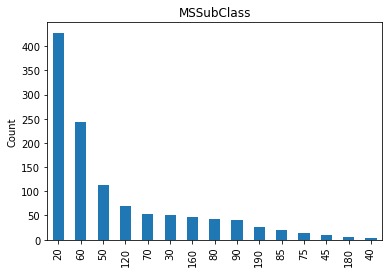

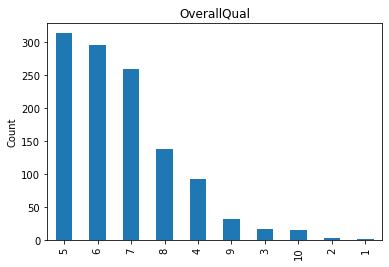

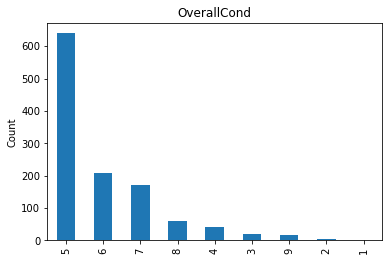

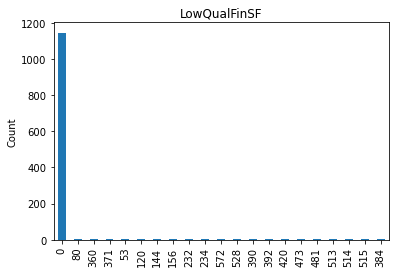

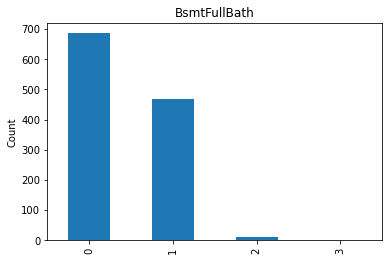

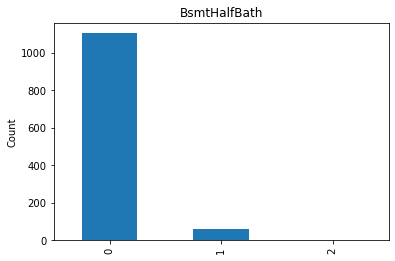

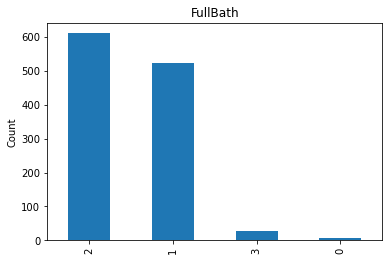

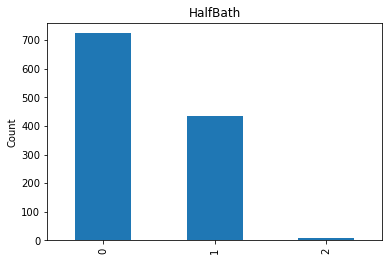

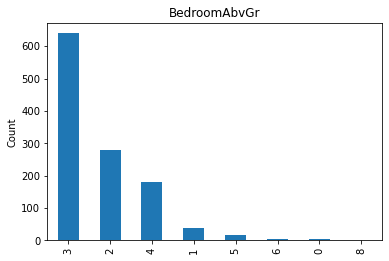

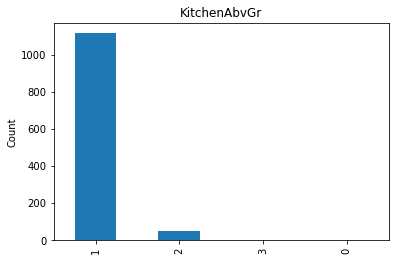

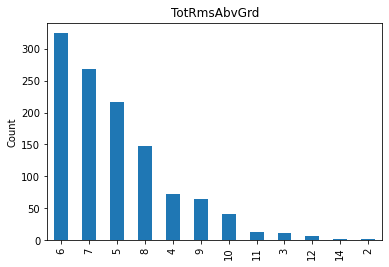

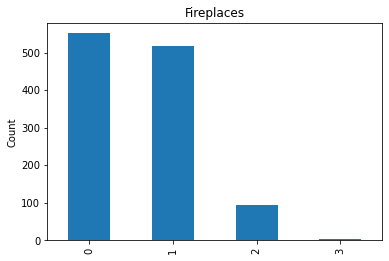

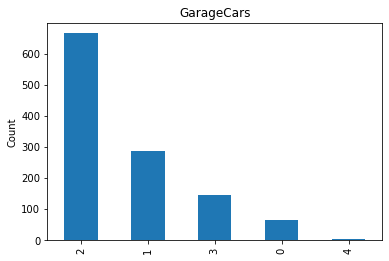

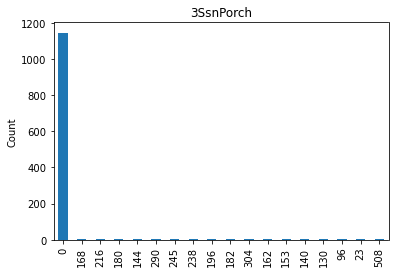

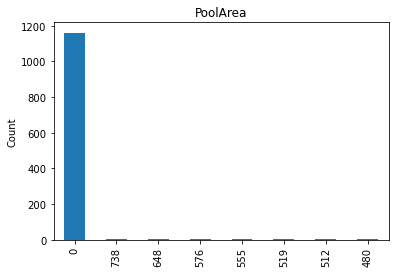

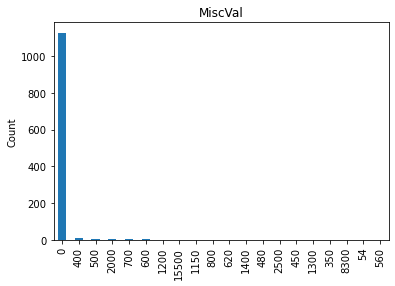

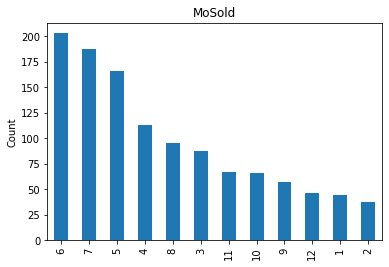

In [28]:
#For discrete numerical features, use bar plot to see distributions
for feature in col_disc:
    data=train.copy()
    data[feature].value_counts().plot.bar()
    
    plt.title(feature)
    plt.ylabel("Count")
    plt.show()

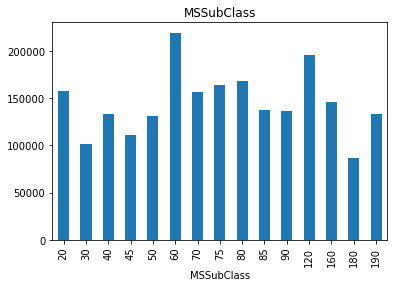

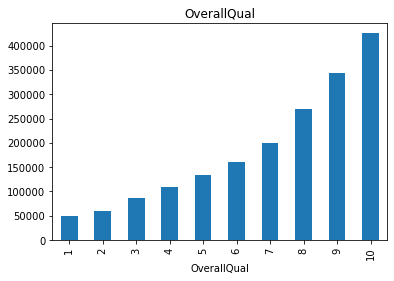

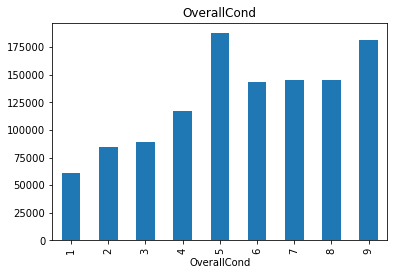

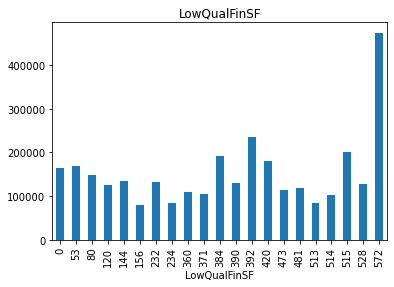

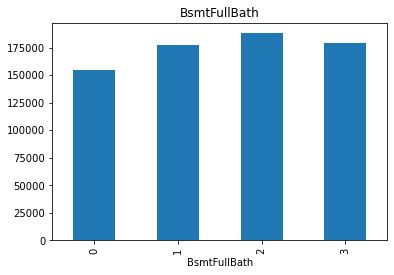

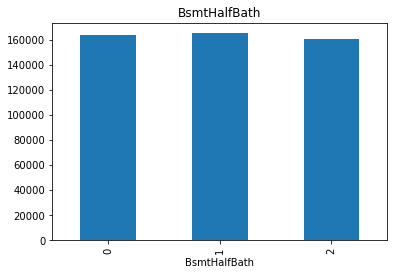

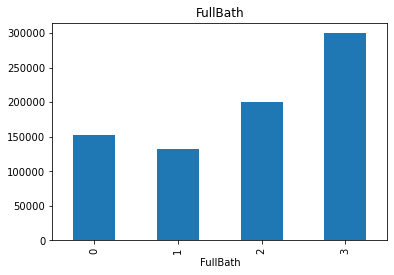

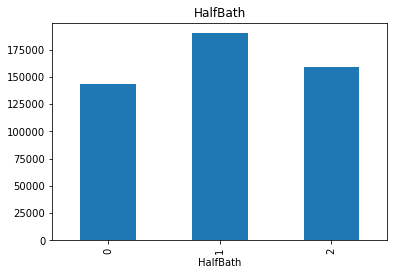

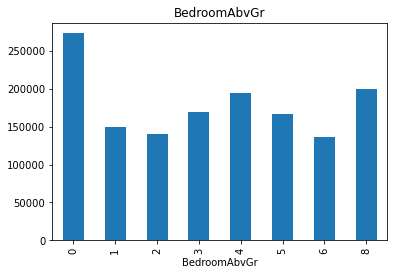

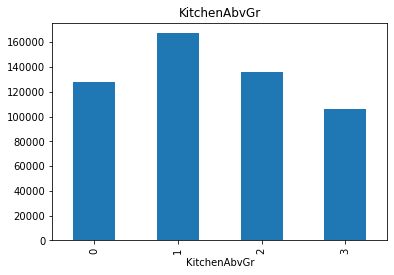

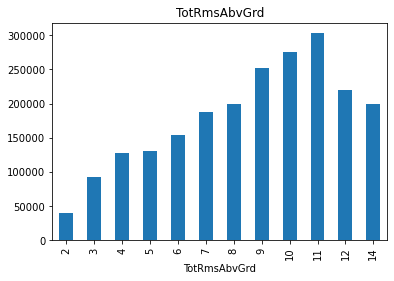

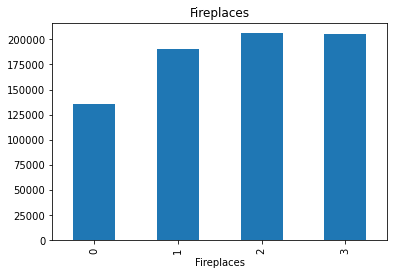

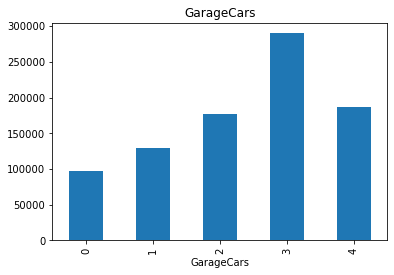

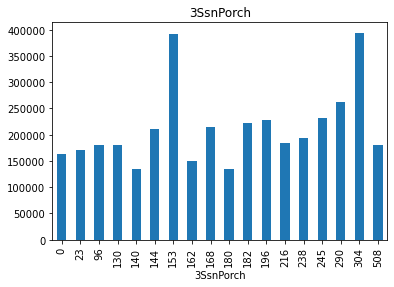

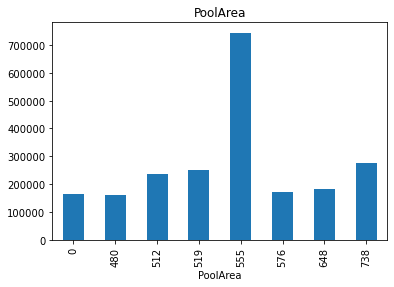

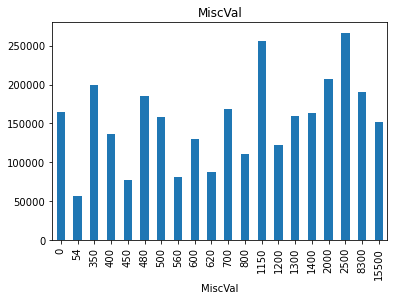

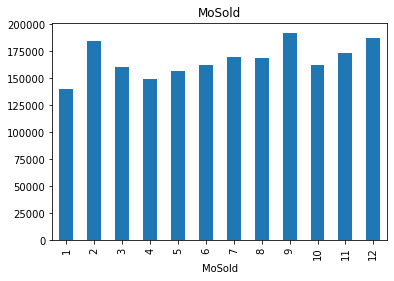

In [29]:
#Plot to see relationsip between discrete numerical features and sale prices
for feature in col_disc:
    data=train.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
   
    plt.title(feature)
    plt.show()

Can see some discrete numerical features have positive correlation ("OverallQual" for example) to sale price.

In [30]:
train.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.004259,-0.006629,-0.029212,-0.036965,0.039761,-0.016942,-0.018590,-0.060652,0.003868,0.005269,-0.019494,-0.013812,0.009647,-0.029671,-0.070180,-0.024325,0.023027,-0.043572,-0.015187,-0.028512,0.009376,0.001216,-0.001613,-0.024175,-0.000469,0.007549,0.010048,-0.027498,-0.013642,0.004885,-0.021773,0.005169,0.065832,0.001304,0.023479,-0.008853,-0.023897
MSSubClass,0.004259,1.000000,-0.365220,-0.124151,0.070462,-0.056978,0.023988,0.056618,0.027868,-0.052236,-0.062403,-0.134170,-0.214042,-0.227927,0.300366,0.053737,0.086448,0.004556,0.008207,0.140807,0.168423,-0.013283,0.283506,0.051179,-0.035792,0.077630,-0.027639,-0.092408,-0.022609,0.017468,-0.004252,-0.043210,-0.013291,0.009583,-0.023503,-0.016015,-0.038595,-0.060775
LotFrontage,-0.006629,-0.365220,1.000000,0.557257,0.247809,-0.053345,0.118554,0.096050,0.202225,0.247780,0.002514,0.123943,0.386261,0.448186,0.099250,0.007885,0.410414,0.104255,0.001528,0.189321,0.053168,0.264010,-0.002890,0.351969,0.262076,0.061101,0.276798,0.344908,0.101751,0.167092,0.023118,0.059508,0.033111,0.223429,-0.004559,0.025046,-0.004296,0.341294
LotArea,-0.029212,-0.124151,0.557257,1.000000,0.107188,0.017513,0.005506,0.027228,0.121448,0.221851,0.056656,0.006600,0.259733,0.312843,0.059803,-0.001915,0.281360,0.142387,0.059282,0.123197,0.007271,0.117351,-0.013075,0.184546,0.285983,-0.034981,0.158313,0.195162,0.216720,0.093080,-0.007446,0.025794,0.025256,0.097107,0.051679,0.015141,-0.035399,0.249499
OverallQual,-0.036965,0.070462,0.247809,0.107188,1.000000,-0.083167,0.575800,0.555945,0.409163,0.219643,-0.040893,0.308676,0.528285,0.458758,0.316624,-0.039295,0.599700,0.101732,-0.030702,0.548824,0.296134,0.099639,-0.178220,0.432579,0.390067,0.541719,0.596322,0.566782,0.227137,0.341030,-0.098374,0.045919,0.059387,0.072247,-0.025786,0.090638,-0.048759,0.789185
OverallCond,0.039761,-0.056978,-0.053345,0.017513,-0.083167,1.000000,-0.377731,0.080669,-0.137882,-0.028810,0.044336,-0.146384,-0.162481,-0.134420,0.036668,0.041877,-0.065006,-0.039680,0.091016,-0.171931,-0.052125,0.028393,-0.076047,-0.039952,-0.013632,-0.318278,-0.161996,-0.126021,0.012290,-0.024899,0.056074,0.040476,0.069463,-0.003603,0.075178,0.005519,0.055517,-0.065642
YearBuilt,-0.016942,0.023988,0.118554,0.005506,0.575800,-0.377731,1.000000,0.592829,0.323006,0.227933,-0.027682,0.155559,0.386265,0.279450,0.011834,-0.189044,0.198644,0.164983,-0.028161,0.471264,0.243227,-0.080639,-0.167869,0.095476,0.134313,0.826366,0.525346,0.473216,0.204830,0.191069,-0.373544,0.037079,-0.058760,0.006408,-0.030008,0.031754,-0.013976,0.514408
YearRemodAdd,-0.018590,0.056618,0.096050,0.027228,0.555945,0.080669,0.592829,1.000000,0.181869,0.114430,-0.044694,0.174732,0.280720,0.233384,0.155102,-0.072526,0.295048,0.104643,-0.011375,0.444446,0.194943,-0.035847,-0.139943,0.206923,0.118378,0.639153,0.428325,0.387744,0.197410,0.238755,-0.193574,0.064763,-0.046220,0.006874,-0.001199,0.024663,0.033265,0.507831
MasVnrArea,-0.060652,0.027868,0.202225,0.121448,0.409163,-0.137882,0.323006,0.181869,1.000000,0.267066,-0.065723,0.109850,0.366833,0.339938,0.173358,-0.070518,0.387891,0.086720,0.014198,0.268545,0.200926,0.091717,-0.038281,0.279391,0.243812,0.254547,0.342553,0.365849,0.151978,0.131850,-0.102321,0.018721,0.046509,0.013590,-0.027583,0.013432,-0.013493,0.466386
BsmtFinSF1,0.003868,-0.052236,0.247780,0.221851,0.219643,-0.028810,0.227933,0.114430,0.267066,1.000000,-0.052145,-0.499861,0.518940,0.445876,-0.127656,-0.070932,0.217160,0.645126,0.063895,0.054511,0.015767,-0.114888,-0.065450,0.043499,0.257482,0.135558,0.197529,0.286290,0.192939,0.108802,-0.082351,0.025485,0.

<AxesSubplot:>

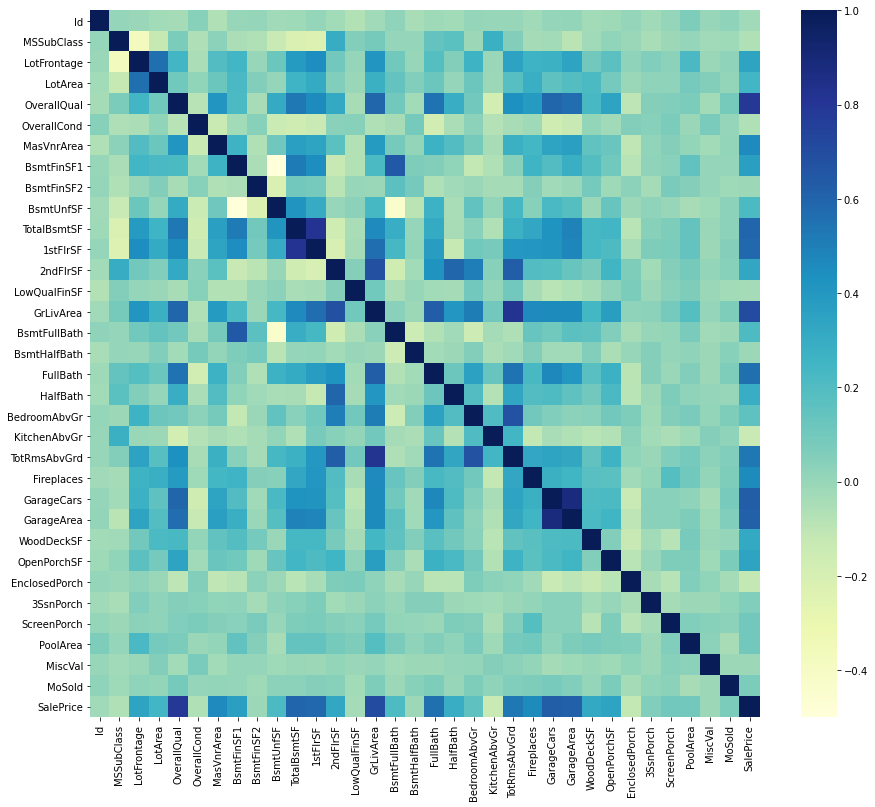

In [31]:
# Check correlation of the numerical features using heat map
corr = train[col_num].corr()

plt.subplots(figsize=(15,13))
sns.heatmap(corr, cmap="YlGnBu")

Can see some features are highly correlated.

# Categorical Features

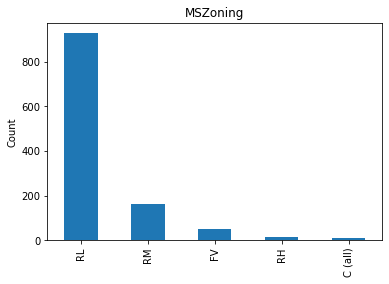

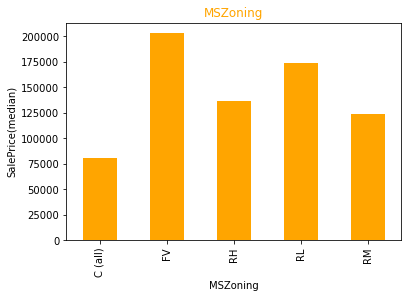

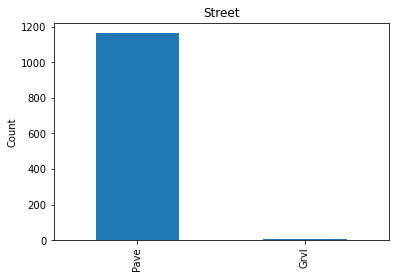

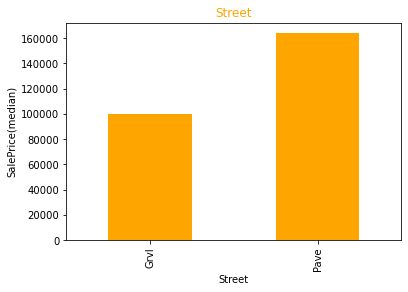

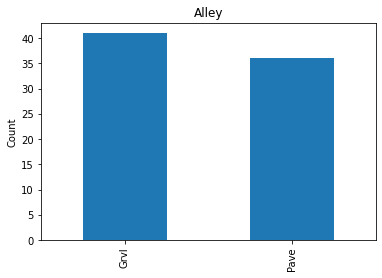

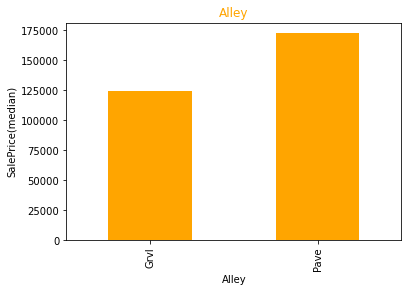

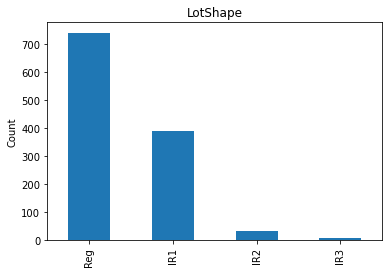

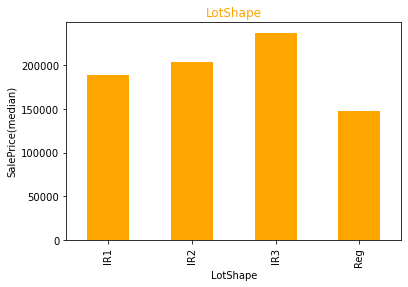

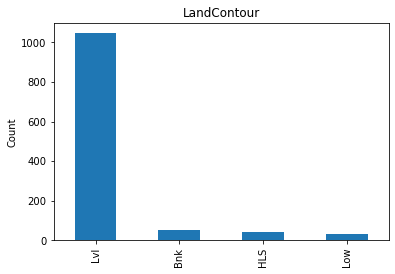

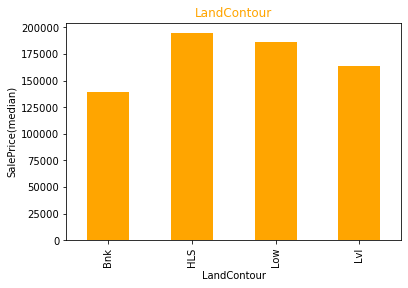

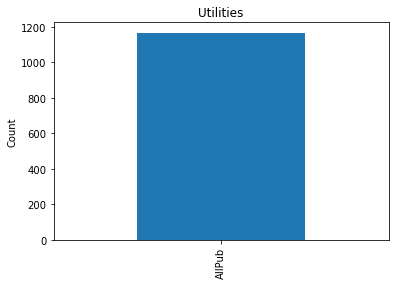

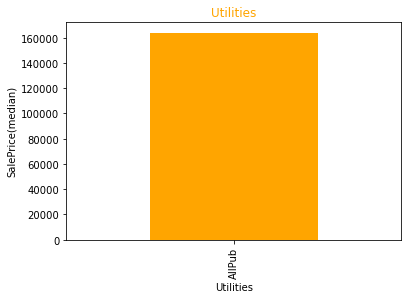

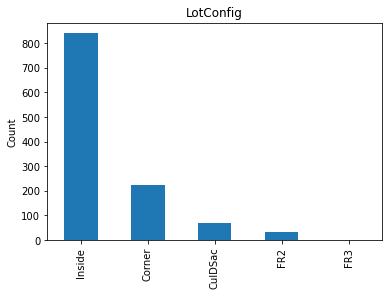

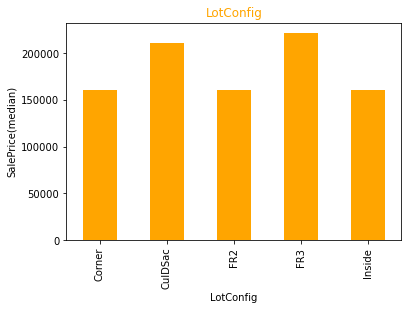

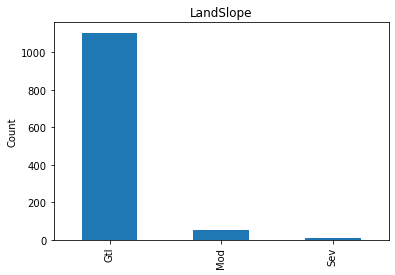

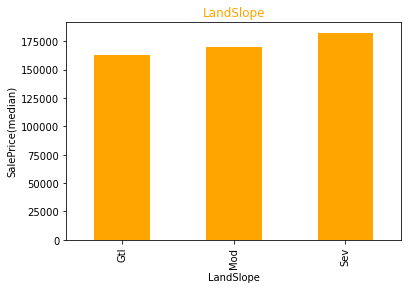

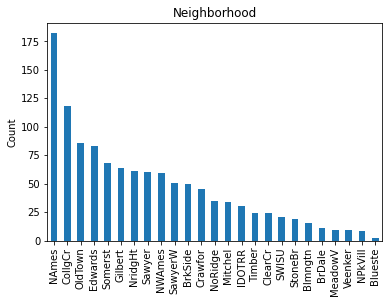

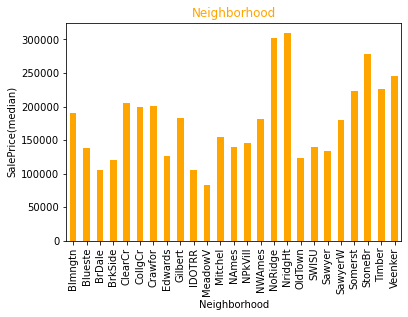

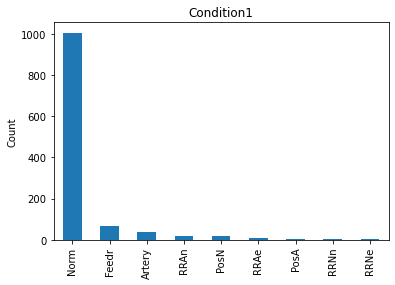

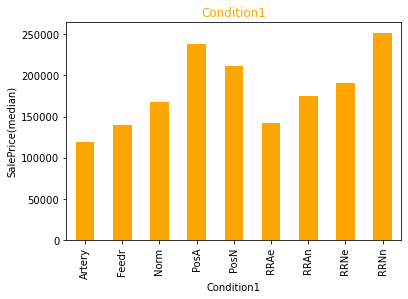

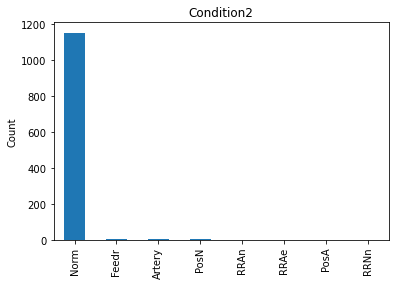

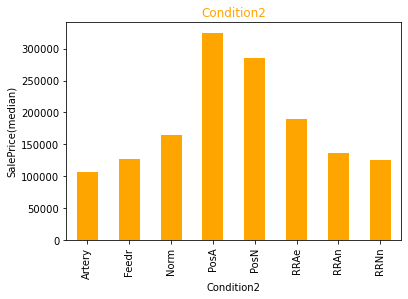

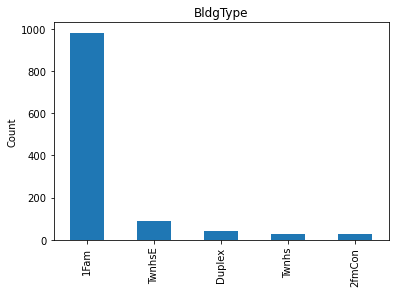

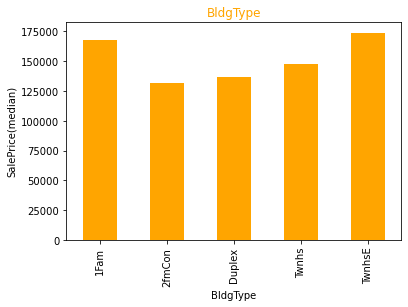

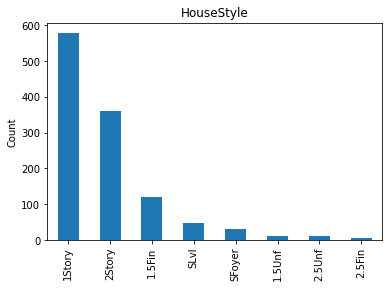

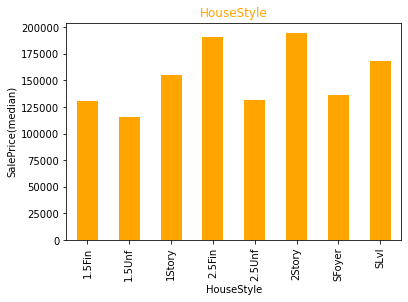

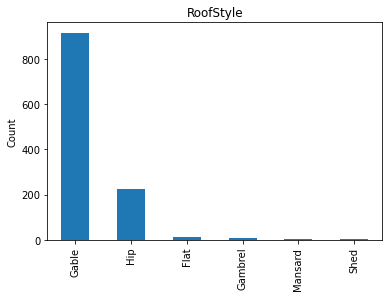

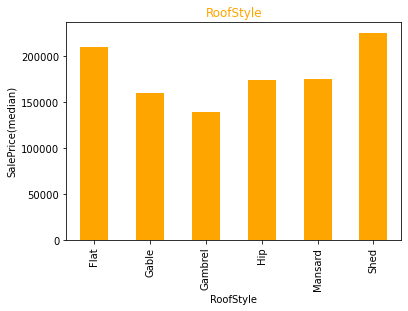

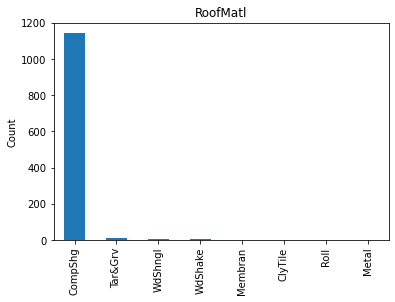

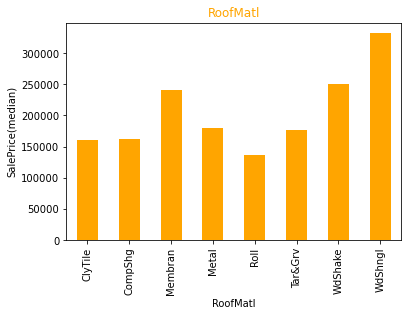

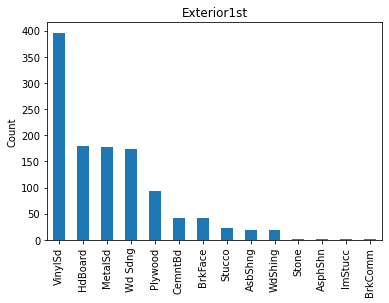

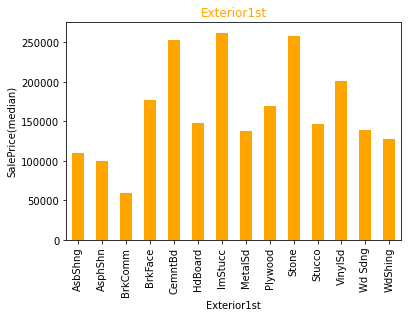

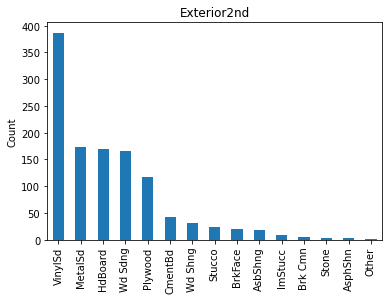

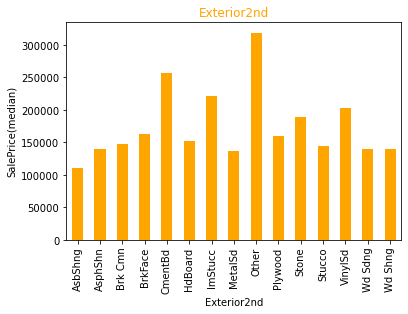

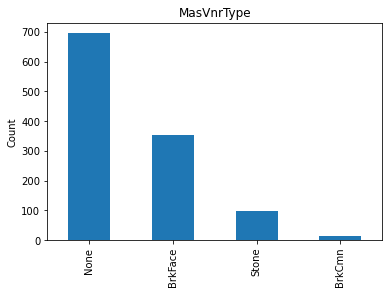

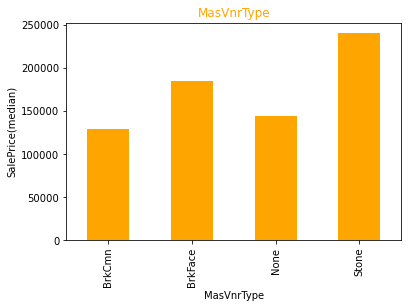

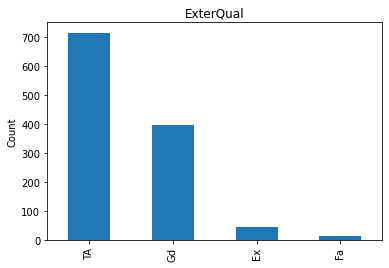

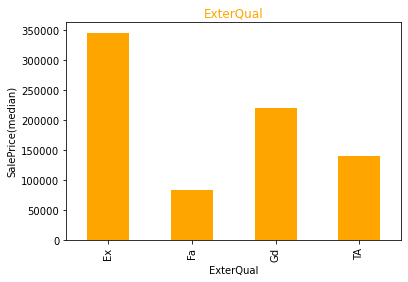

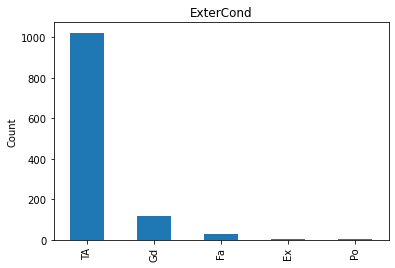

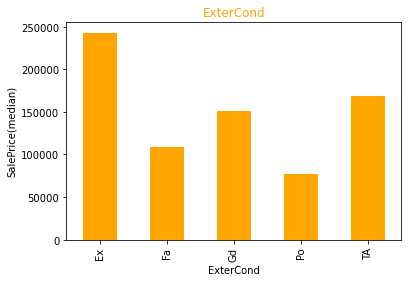

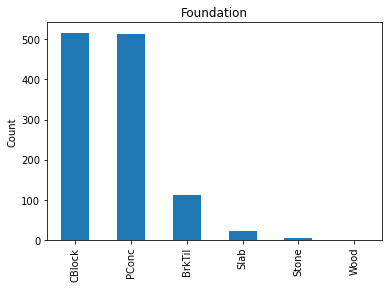

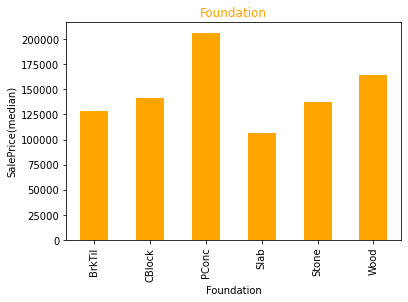

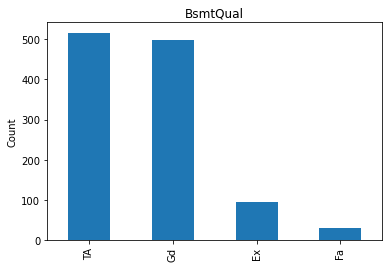

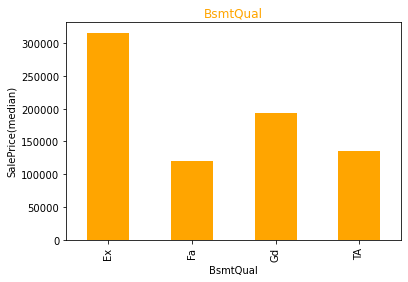

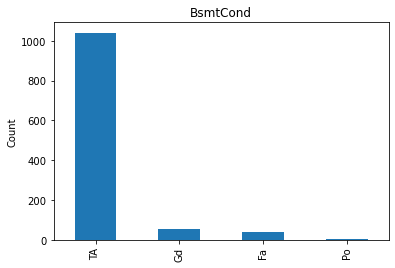

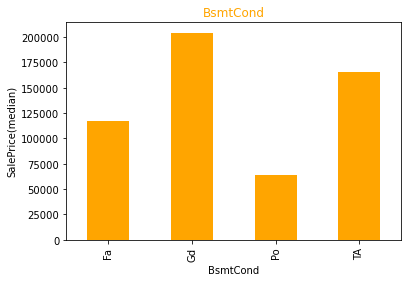

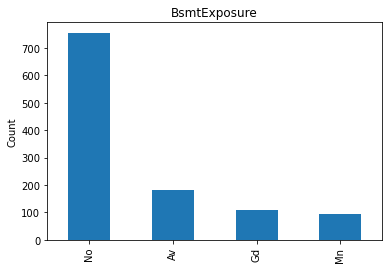

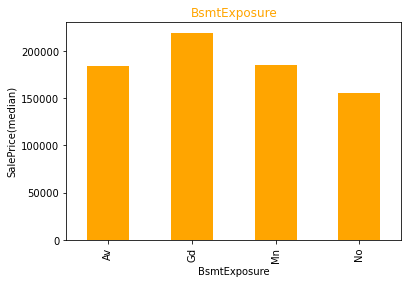

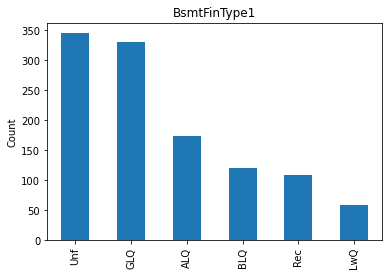

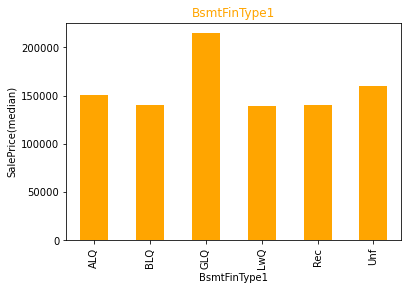

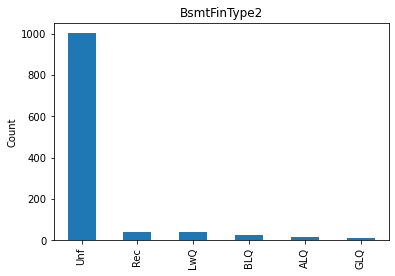

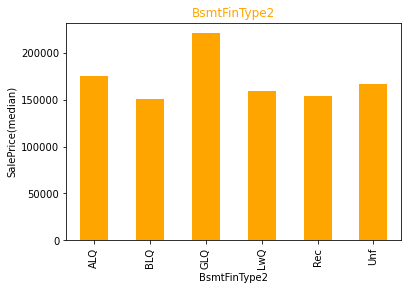

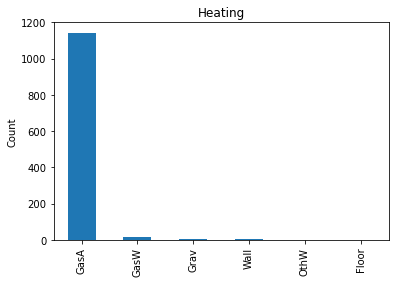

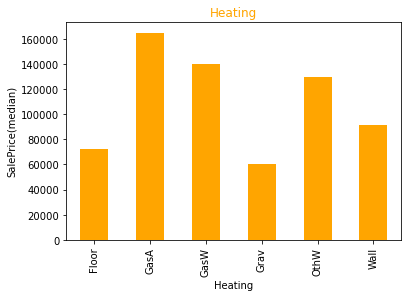

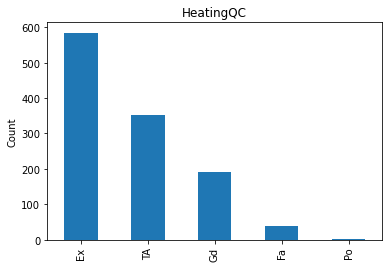

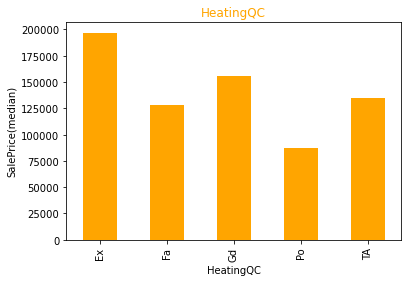

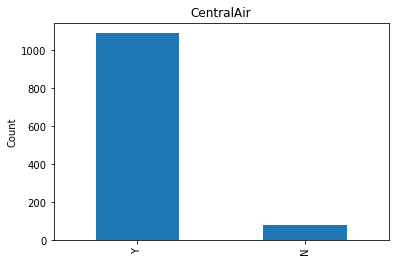

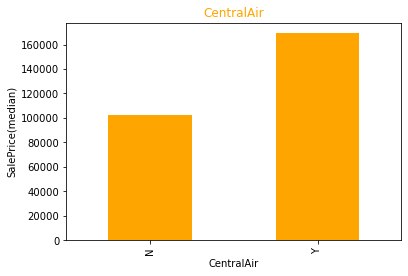

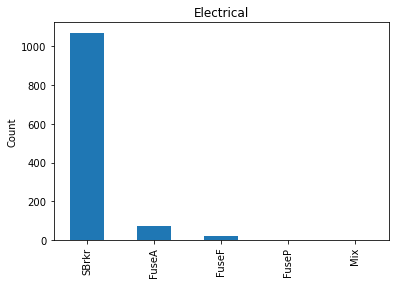

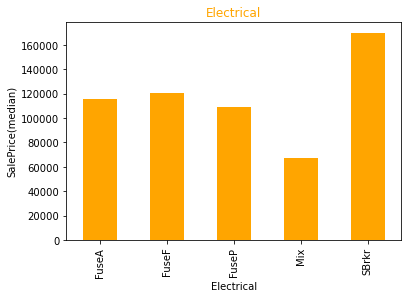

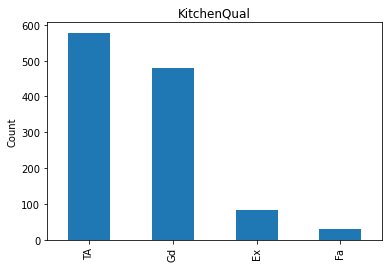

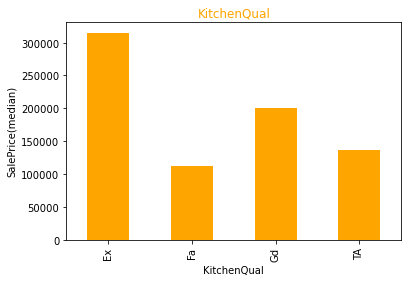

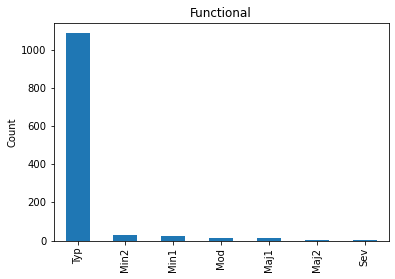

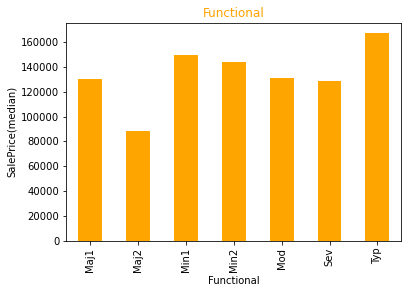

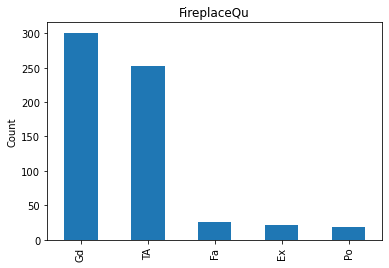

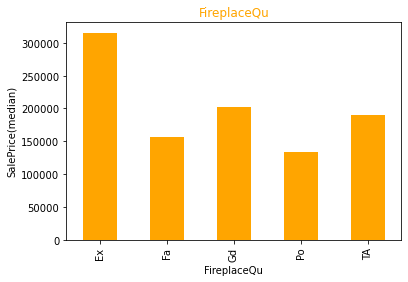

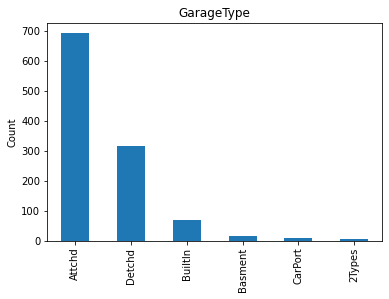

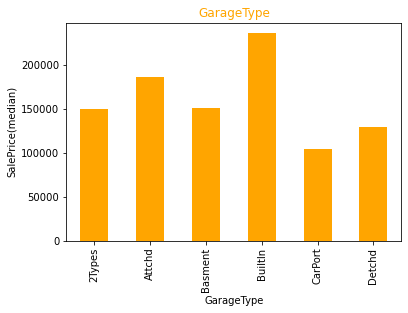

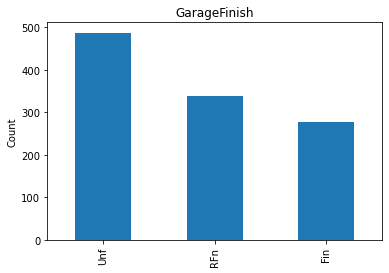

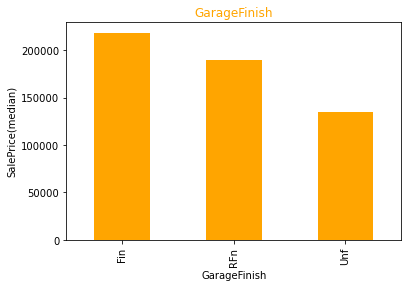

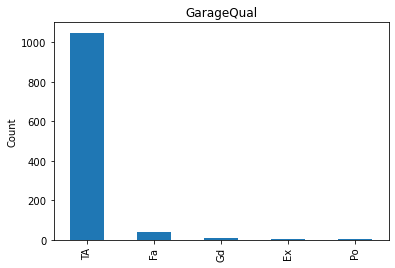

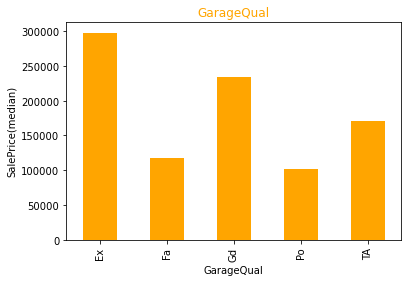

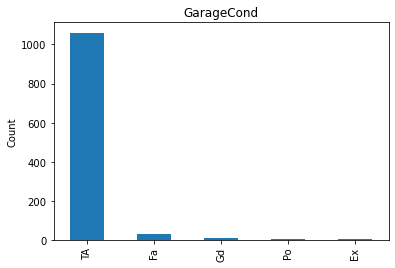

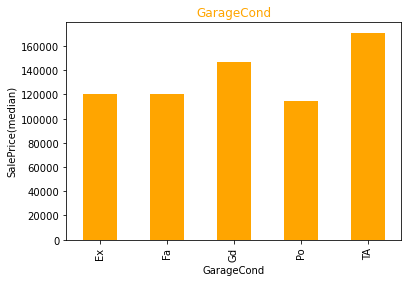

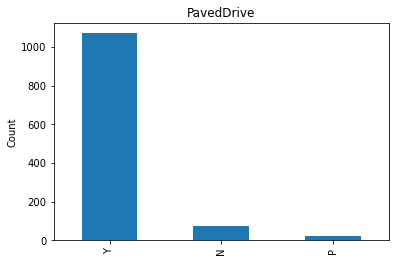

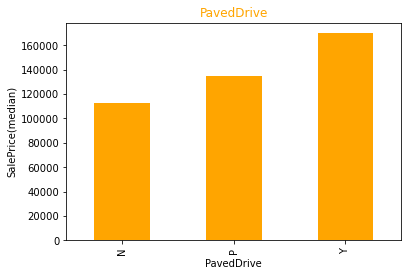

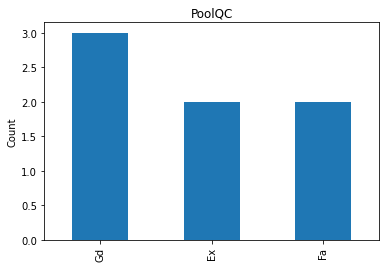

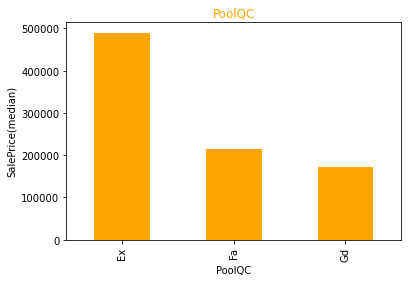

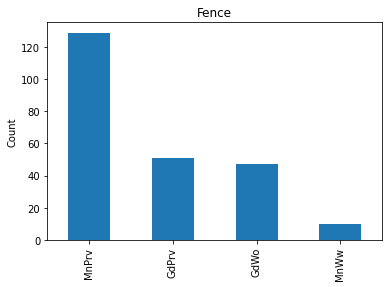

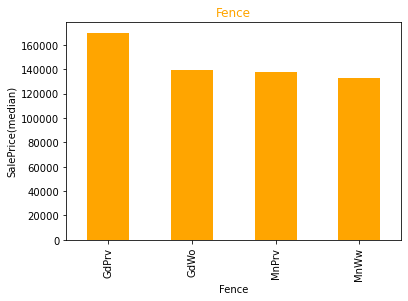

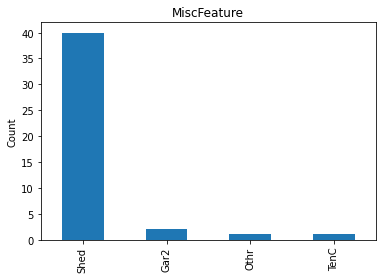

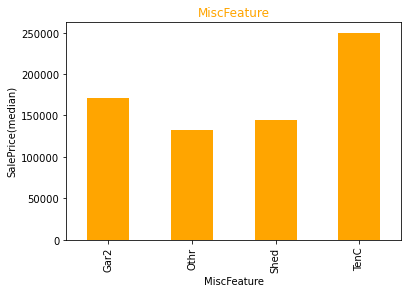

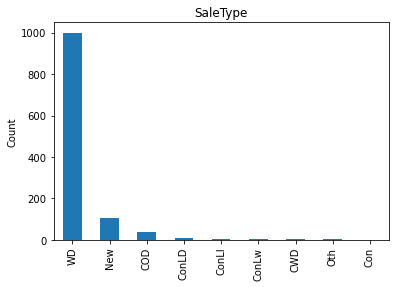

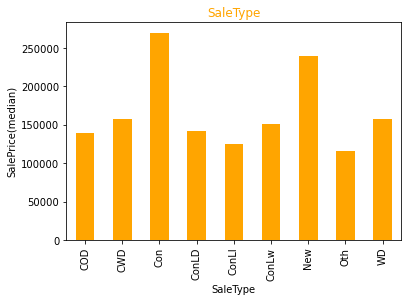

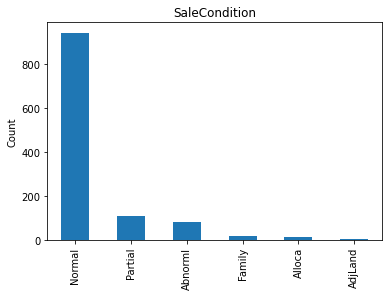

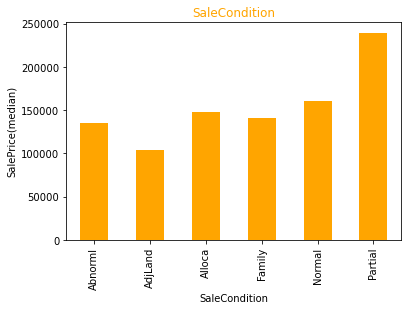

In [32]:
#Bar plots to see categorical features' distribution and the relationships with sale price
for feature in col_cat:
    data=train.copy()
    
    data[feature].value_counts().plot.bar()
    plt.title(feature)
    plt.ylabel("Count")
    plt.show()
    
    rec1=data.groupby(feature)["SalePrice"].median().plot.bar(color='orange')
    plt.title(feature,color='Orange')
    plt.ylabel("SalePrice(median)")
    plt.show()

There are some cateogorical features having many categories and some categories don't have many samples in. We will group those rare features together later. There are some categories in some cateogorical features having obviously higher or lower sale price. For example, Partial "SaleCondition" seems to have higher sale price. We need to consider the count in those categories. If the counts are very low, it could be some special cases that doesn't represent the population.

In [33]:
#Check the exact numbers counts of each categorical features to help decide the cut-off of rare features we would group together later.
for feature in col_cat:
    data=train.copy()
    print(feature)
    print(data[feature].value_counts())
    print("______________________")

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
______________________
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
______________________
Alley
Grvl    41
Pave    36
Name: Alley, dtype: int64
______________________
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
______________________
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
______________________
Utilities
AllPub    1168
Name: Utilities, dtype: int64
______________________
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
______________________
LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64
______________________
Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSid

We will later group those with <1% features as rare features.

# Feature Preprocessing

In [36]:
## split the data first and then apply feature
## Engineering
train2 = pd.read_csv(r'C:\Users\User\Desktop\Assigment_4\Project-Housing_splitted\train.csv')
y=train2["SalePrice"]
X=train2.drop(['SalePrice'], axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

Missing Values

# Numerical Missing Values

In [37]:
#Get numerical Features with missing values
col_num_missing=[feature for feature in col_num if train2[feature].isna().sum()>0]
col_num_missing_test=[feature for feature in col_num_test if test[feature].isna().sum()>0]

#As seen in the data EDA, missing values have meanings. So, replace missing values with median
#but record if we fill in missing value

for feature in col_num_missing:
    train2[feature+"_nan"]=np.where(train2[feature].isnull(),1,0)
    train2[feature].fillna(0,inplace=True)

for feature in col_num_missing_test:
    test[feature+"_nan"]=np.where(test[feature].isnull(),1,0)
    test[feature].fillna(0,inplace=True)

# Categorical Missing Values

In [38]:
#Get categorical features with missing values
col_cat_missing=[feature for feature in col_cat if train2[feature].isnull().sum()>0]
col_cat_missing_test=[feature for feature in col_cat_test if test[feature].isnull().sum()>0]
#fill missing values with "missing"
for feature in col_cat_missing:
    
    train2[feature].fillna("Missing",inplace=True)

for feature in col_cat_missing_test:
    
    test[feature].fillna("Missing",inplace=True)

# Year Features Missing Values and New Features

In [39]:
#Create new features based on difference of "YrSold" and get year features with missing values (training data)
col_yr_missing=[feature for feature in col_year if train2[feature].isnull().sum()>0]


for feature in col_year:
    if feature !="YrSold": 
      train2["YrSold-"+feature]=train2["YrSold"] - train2[feature]
   # col_year.append(feature+"-YrSold")
    
#"GarageYrBlt" has missing values. Fill "YrSold-GarageYrBlt" na with median , create a field to record this, and then drop the "GargaYrBlt" field
train2["YrSold-GarageYrBlt_nan"]=np.where(train2["YrSold-GarageYrBlt"].isnull(),1,0)
train2["YrSold-GarageYrBlt"].fillna(0,inplace=True)
train2.drop(["GarageYrBlt"],axis=1,inplace=True)

In [40]:
#Create new features based on difference of "YrSold" and get year features with missing values (testing data)
col_yr_missing_test=[feature for feature in col_year_test if test[feature].isnull().sum()>0]


for feature in col_year_test:
    if feature !="YrSold": 
      test["YrSold-"+feature]=test["YrSold"] - test[feature]
   # col_year.append(feature+"-YrSold")
    
#"GarageYrBlt" has missing values. Fill "YrSold-GarageYrBlt" na with median , create a field to record this, and then drop the "GargaYrBlt" field
test["YrSold-GarageYrBlt_nan"]=np.where(test["YrSold-GarageYrBlt"].isnull(),1,0)
test["YrSold-GarageYrBlt"].fillna(0,inplace=True)
test.drop(["GarageYrBlt"],axis=1,inplace=True)

# Normalize continuous numerical features

In [41]:
#Log normalize training data on none-zero continuous numerical features and target variables
#train2['SalePrice'] = np.log(train2['SalePrice'])
for feature in col_cont:
    
    if np.any(train2[feature]==0) or feature=="SalePrice" or feature=="Id":
        pass
    else:
        
        train2[feature]=np.log(train2[feature])

In [42]:
#Log normalize testing data on none-zero continuous numerical features 
for feature in col_cont_test:
    
    if np.any(test[feature]==0) or feature=="Id":
        pass
    else:
        
        test[feature]=np.log(test[feature])

# Outliers

In [43]:
#Deleting outliers in training data
#train2 = train2.drop(train2[(train2['1stFlrSF']>8.4) & (train2['SalePrice']<12.5)].index)
#train2 = train2.drop(train2[(train2['GrLivArea']>8.3) & (train2['SalePrice']<12.5)].index)

# Feature engineering

Categorical Features Encoding

In [44]:
#Training data
#As seen in EDA, some categorical features are with very rare categories
#group those together for later encoding


for feature in col_cat:
    temp=train2.groupby(feature)['SalePrice'].count()/len(train2)
    temp_df=temp[temp>0.01].index
    train2[feature]=np.where(train2[feature].isin(temp_df),train2[feature],'Rare_var')
    test[feature]=np.where(test[feature].isin(temp_df),test[feature],'Rare_var')

In [45]:
#Testing data
#As seen in EDA, some categorical features are with very rare categories
#group those together for later encoding

for feature in col_cat:
    labels_ordered=train2.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train2[feature]=train2[feature].map(labels_ordered)
    test[feature]=test[feature].map(labels_ordered)

# Feature Scaling

In [46]:
#Import libraries 
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#Drop "Id" and seperate independent variables vs. target variables for training data
y_train=train2['SalePrice']
X_train=train2.drop(["SalePrice","Id"], axis=1)

#Drop "Id" for testing data
X_test=test.drop(["Id"], axis=1)

In [47]:
# Apply Feature Selection

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [48]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [49]:
#Print the number of features selected
selected_feat = X_train.columns[(feature_sel_model.get_support())]


print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 84
selected features: 83
features with coefficients shrank to zero: 1


In [50]:
#Keep only selected features in training and testing data

X_train=X_train[selected_feat]
X_test=X_test[selected_feat]

# Model training

In [51]:
#Split training vs. testing set in training data
Xt_train,Xt_test,yt_train,yt_test=train_test_split(X_train,y_train,test_size=0.1,random_state=0)

In [52]:
#Linear regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model=LinearRegression()
model.fit(Xt_train,yt_train)
score=model.score(Xt_test,yt_test)
print(score)

0.7029283109797294


0.7029283109797294


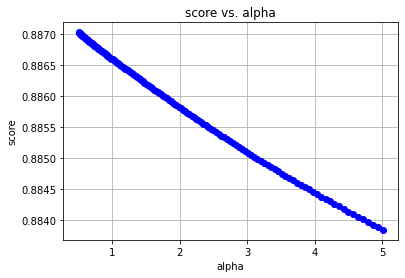

The optimaized alpha and score of Lasso linear is:  0.5011872336272722 0.887025713604216


In [53]:
#Ridge regression (score)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge

alphas = np.logspace (-0.3, 0.7, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('-inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(Xt_train, yt_train)
    scores[i] = ridge.score(Xt_test, yt_test)
    if scores[i] > max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
print(score)
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

0.7029283109797294


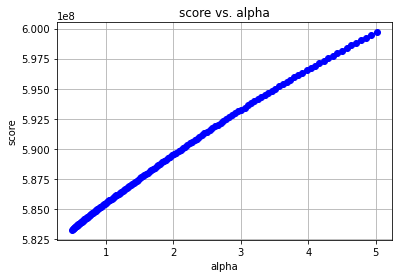

The optimaized alpha and score of Lasso linear is:  0.5011872336272722 583253137.8105294


In [54]:
#Ridge regression (mean square error)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
alphas = np.logspace (-0.3, 0.7, num=150)
# alphas= [0.000000001]
scores = np.empty_like(alphas)
opt_a = float('-inf')
max_score = float('inf')
for i, a in enumerate(alphas):
    ridge = Ridge()
    ridge.set_params(alpha = a)
    ridge.fit(Xt_train, yt_train)
    y_pred = ridge.predict(Xt_test)
    
    scores[i] = mean_squared_error(yt_test, y_pred)
    if scores[i] < max_score:
        max_score = scores[i]
        opt_a = a
        ridge_save = ridge
print(score)
plt.plot(alphas, scores, color='b', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=6)
plt.xlabel('alpha')
plt.ylabel('score')
plt.grid(True)
plt.title('score vs. alpha')
plt.show()
print ('The optimaized alpha and score of Lasso linear is: ', opt_a, max_score)

# Get Results on Testing Data

In [55]:
X_test.isnull().sum()

MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
Street                    0
                         ..
MasVnrArea_nan            0
YrSold-YearBuilt          0
YrSold-YearRemodAdd       0
YrSold-GarageYrBlt        0
YrSold-GarageYrBlt_nan    0
Length: 83, dtype: int64

In [56]:
#Seems "KitchenQual" still have 1 missing value. Fill with 1
X_test['KitchenQual'].fillna(1, inplace=True)

In [57]:
#Predict using best model 
ridge = Ridge()
ridge.set_params(alpha = 1.5248301709223908)
ridge.fit(Xt_train, yt_train)
y_test_pred = ridge.predict(X_test)

# Saving the model

In [58]:
#Save prediction results 
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_test_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission3.csv', index=False)

In [59]:
my_submission.head()

,Id,SalePrice
0,337,294400.308189
1,1018,182506.618477
2,929,217696.058859
3,1148,120749.281482
4,1227,203972.459584
